In [ ]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
 
for fn in uploaded.keys():
    print('you uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving Data_Cortex_Nuclear.xls to Data_Cortex_Nuclear.xls
you uploaded file "Data_Cortex_Nuclear.xls" with length 1628672 bytes


#data reading

In [ ]:
#reading training dataset
train_df=pd.read_excel('Data_Cortex_Nuclear.xls')
display(train_df)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
print(train_df.dtypes) #checking datatypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


#Exploring,visualizing and preprocessing data

In [ ]:
#dropping string objects as they are not useful in prediction
train_new =  train_df.drop(columns= ['Treatment','Behavior','class','MouseID'],axis = 1) #dropping unnecessary data

In [ ]:
#checking for unique/null values
for col in train_new.columns.values :
    list_vals = pd.unique(train_new[col])
    print(col + ' is of type ' + str(train_new[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values,and ' + str(train_new.isna().sum().sum()) + ' null values')
    if len(list_vals) < 10 :
        list_str =''
        for n_value in range(0,len(list_vals)) :
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('these are : ' + list_str[0:len(list_str)-2])

DYRK1A_N is of type float64, has 1078 unique values,and 1396 null values
ITSN1_N is of type float64, has 1077 unique values,and 1396 null values
BDNF_N is of type float64, has 1078 unique values,and 1396 null values
NR1_N is of type float64, has 1078 unique values,and 1396 null values
NR2A_N is of type float64, has 1078 unique values,and 1396 null values
pAKT_N is of type float64, has 1077 unique values,and 1396 null values
pBRAF_N is of type float64, has 1076 unique values,and 1396 null values
pCAMKII_N is of type float64, has 1078 unique values,and 1396 null values
pCREB_N is of type float64, has 1078 unique values,and 1396 null values
pELK_N is of type float64, has 1078 unique values,and 1396 null values
pERK_N is of type float64, has 1078 unique values,and 1396 null values
pJNK_N is of type float64, has 1077 unique values,and 1396 null values
PKCA_N is of type float64, has 1078 unique values,and 1396 null values
pMEK_N is of type float64, has 1078 unique values,and 1396 null values

In [ ]:
#Genotype have data type object and have two unique value
#converting them to binary
genotype ={ 'Control' : 0 , 'Ts65Dn' : 1}
train_new.Genotype = [genotype[i] for i in train_new.Genotype]

For converting string data to binary the idea from this example is taken https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/ 
The code is generated as per logic of this from scratch.

In [ ]:
#filling null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
data = imp.fit(train_new)
train_new = imp.transform(train_new)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
train_df =train_df.drop(columns= ['Treatment','Behavior','class','MouseID'],axis = 1)

In [ ]:
train_new_df = pd.DataFrame(train_new,columns=train_df.columns) #output was array converting it to dataframe

In [ ]:
train_new_df.dtypes #checking new datatypes after filling null and dropping some columns with strings

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Genotype     float64
Length: 78, dtype: object

In [ ]:
display(train_new_df) #new training dataset

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.108446,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0.0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.110201,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0.0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.109901,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0.0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.118172,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0.0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0

no values are int64 all values are float64

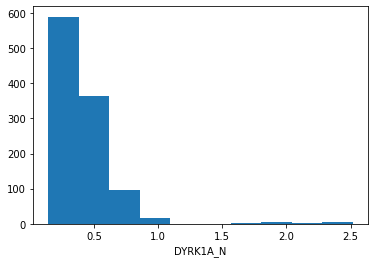

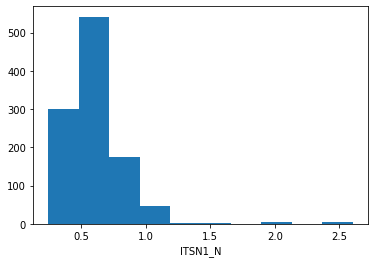

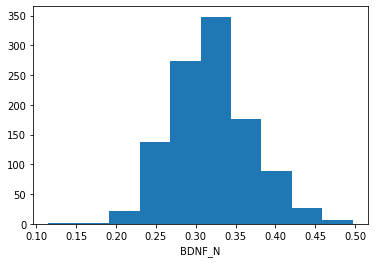

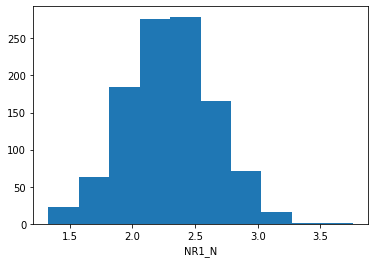

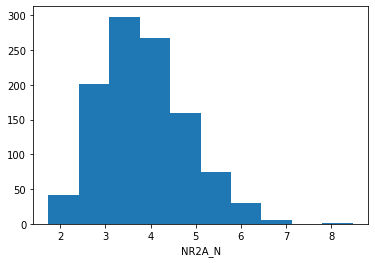

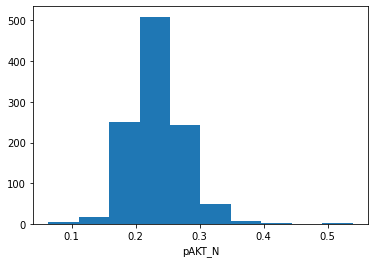

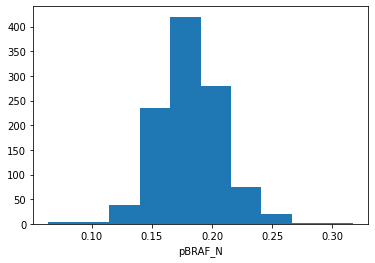

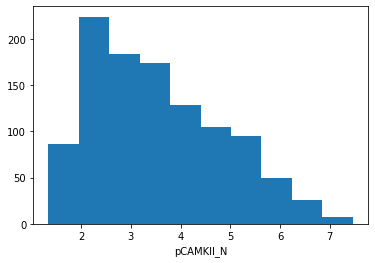

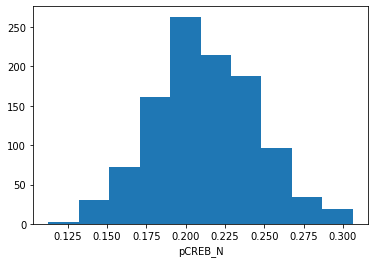

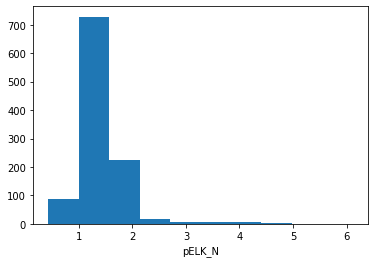

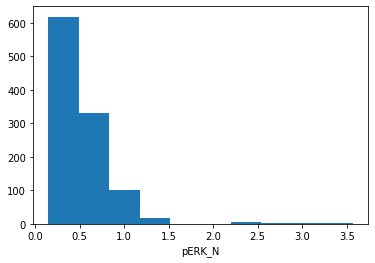

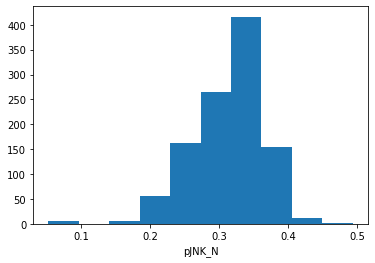

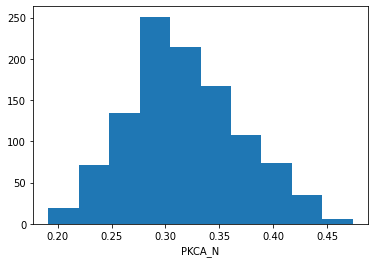

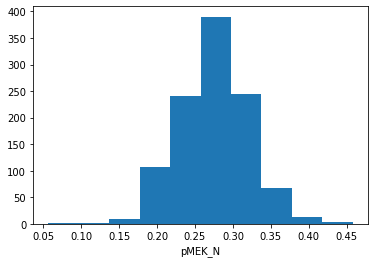

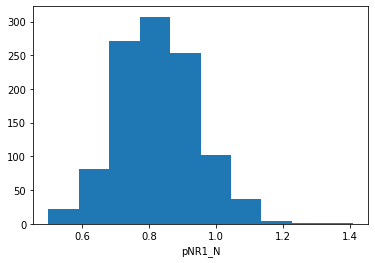

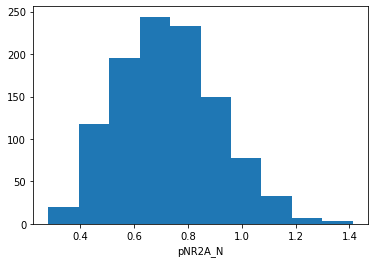

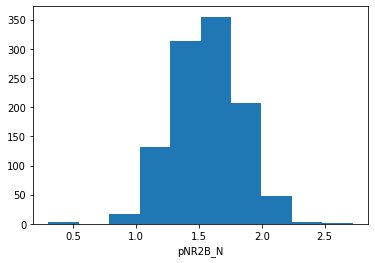

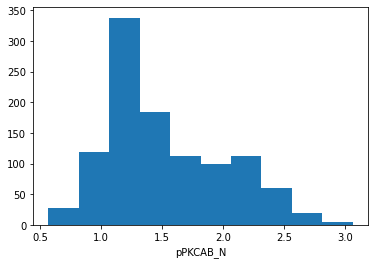

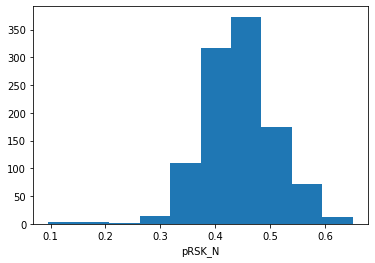

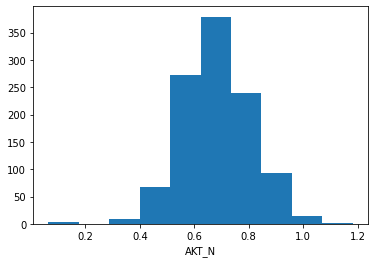

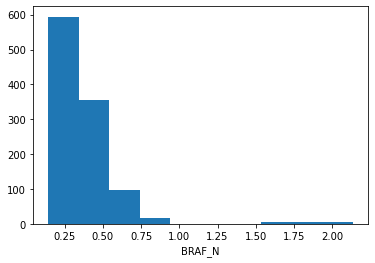

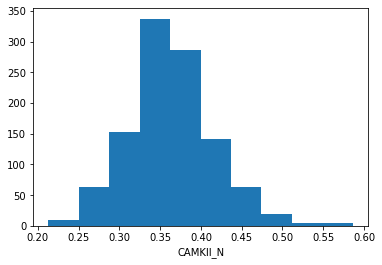

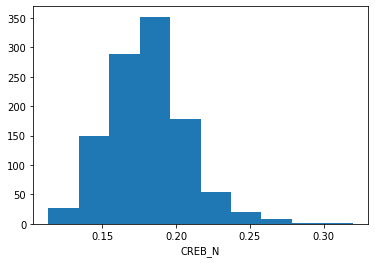

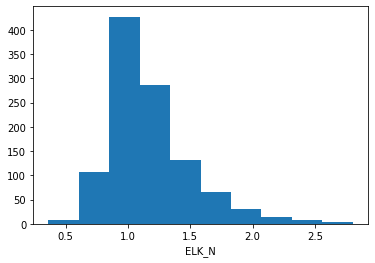

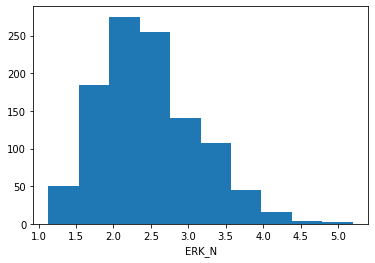

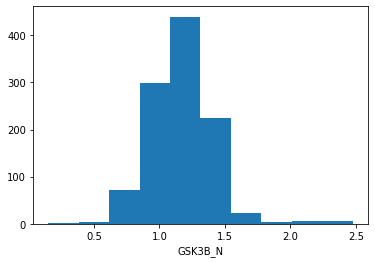

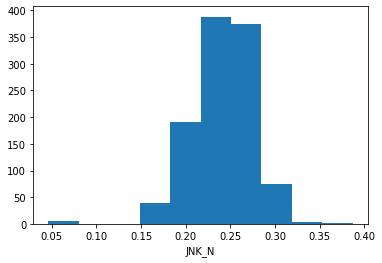

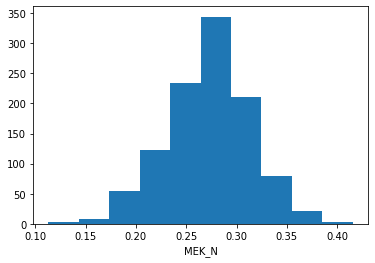

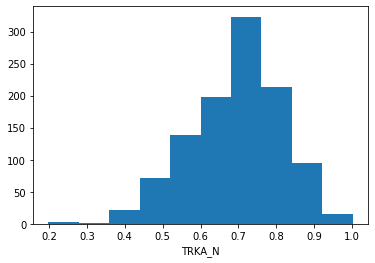

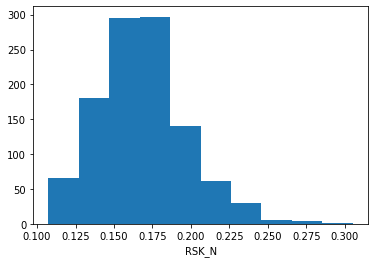

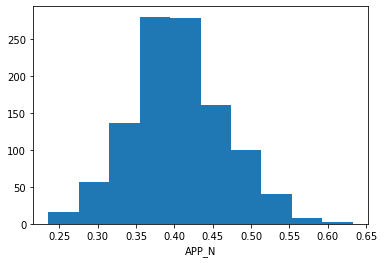

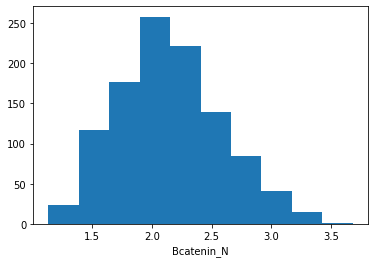

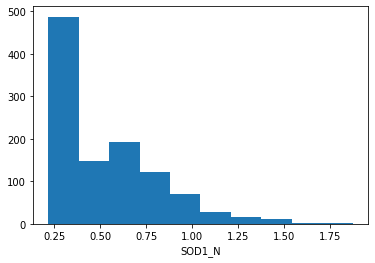

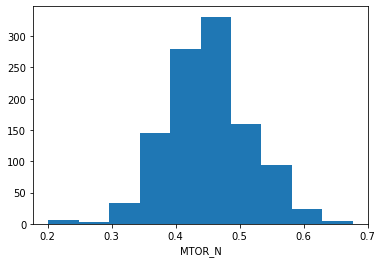

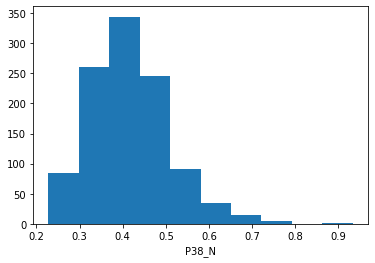

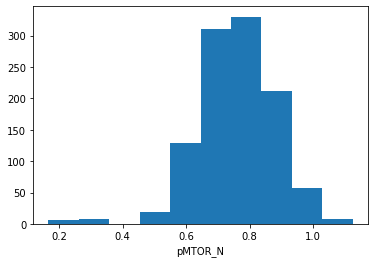

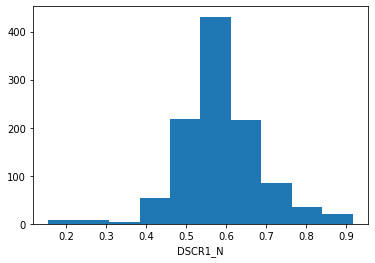

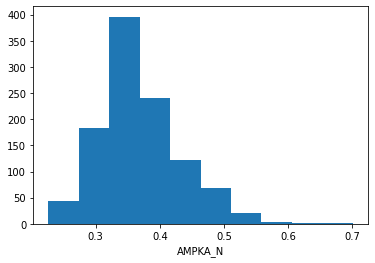

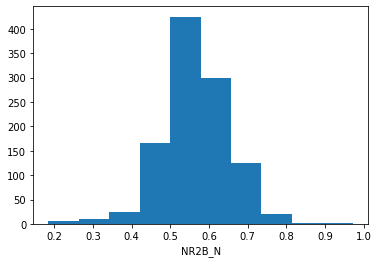

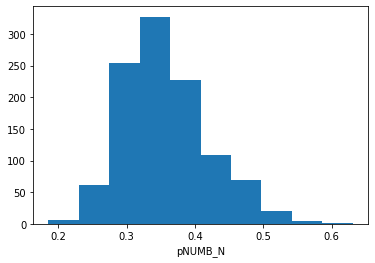

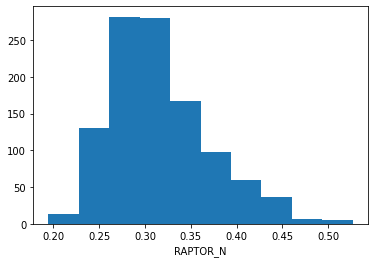

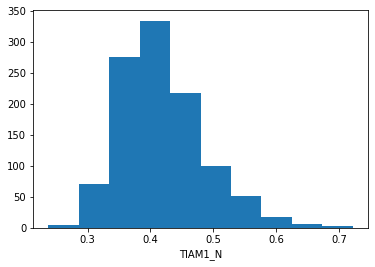

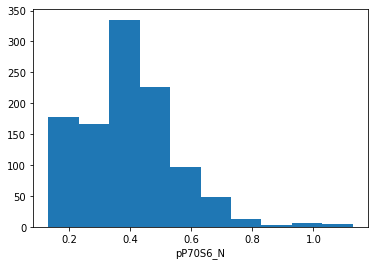

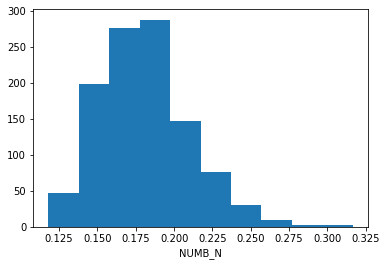

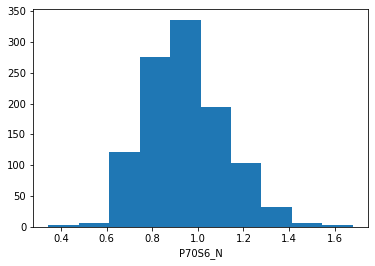

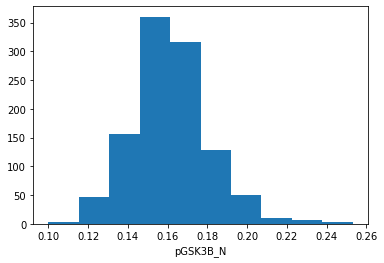

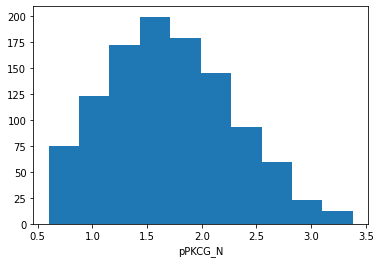

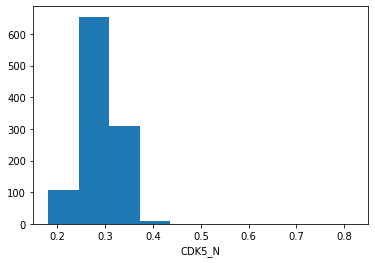

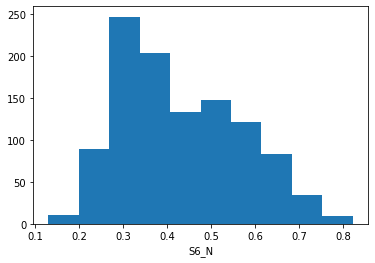

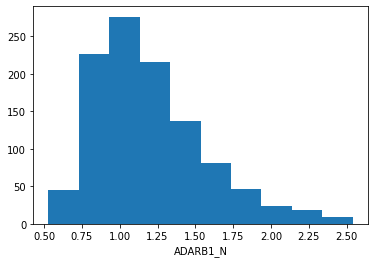

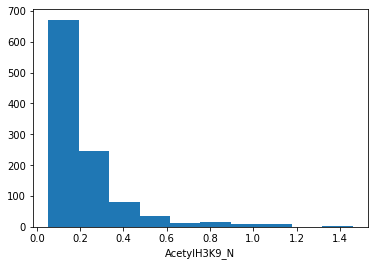

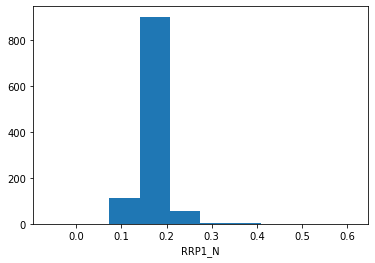

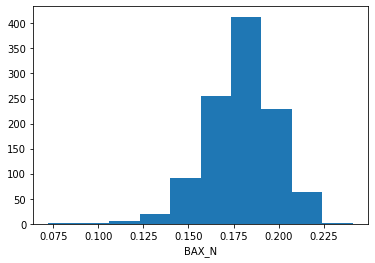

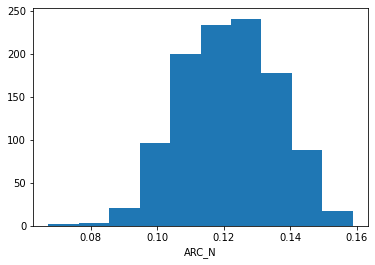

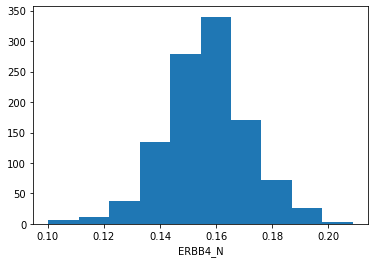

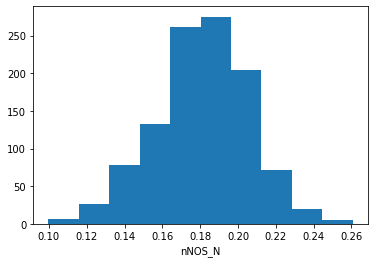

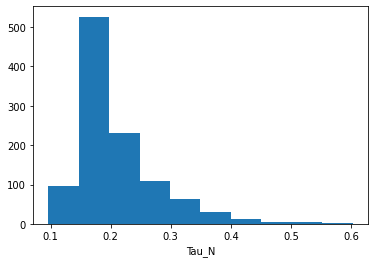

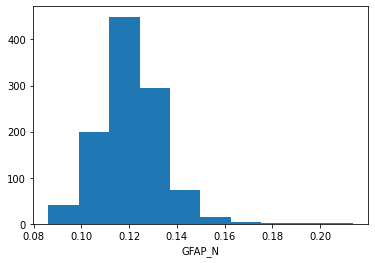

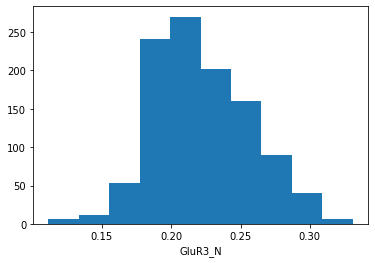

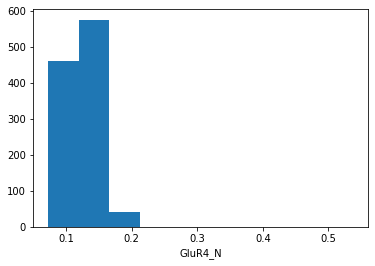

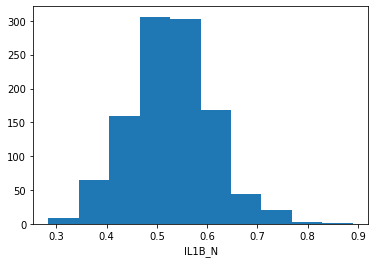

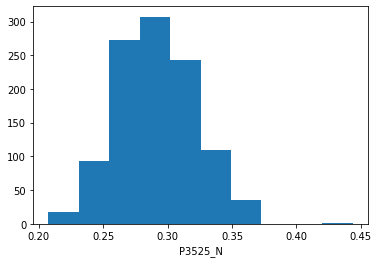

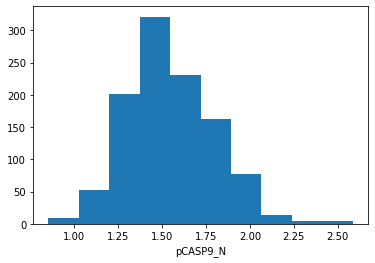

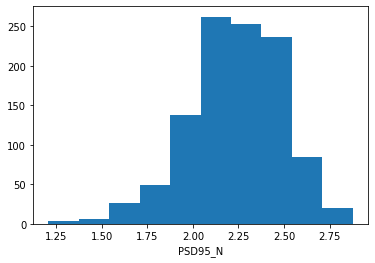

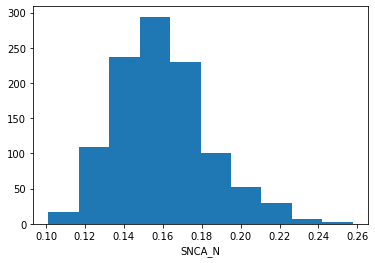

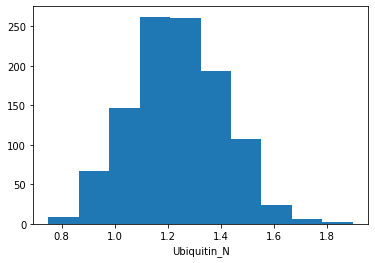

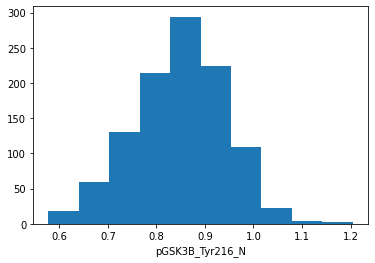

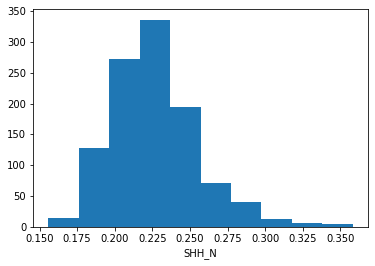

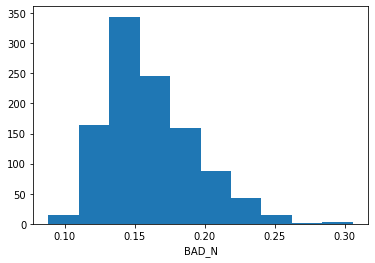

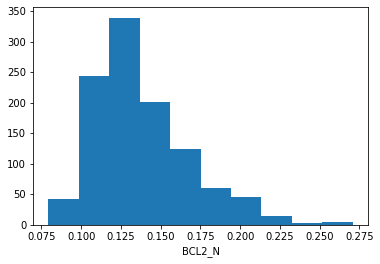

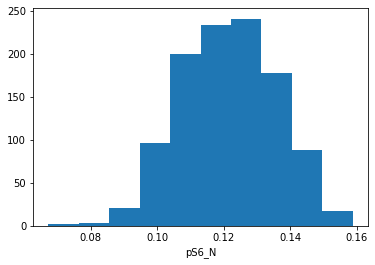

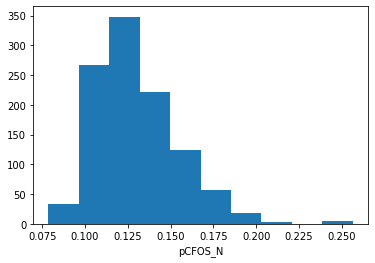

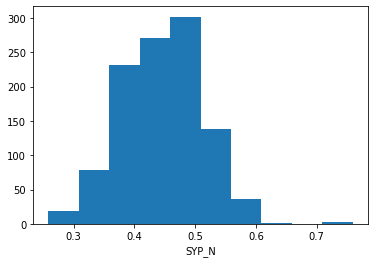

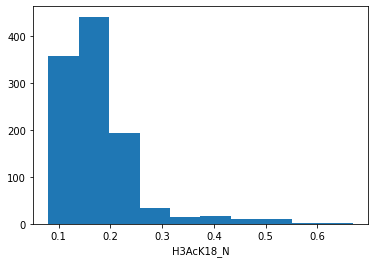

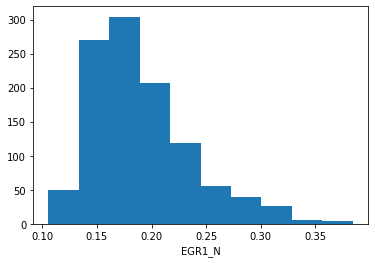

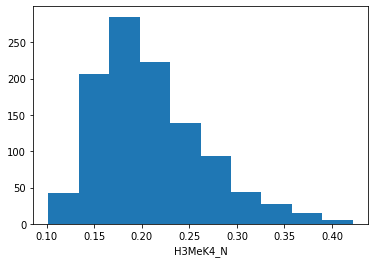

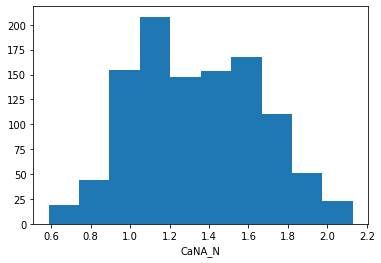

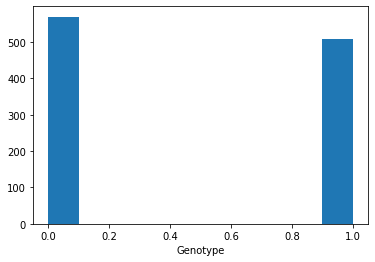

In [ ]:
for col in train_new_df.columns.values:
    if (train_new_df[col].dtypes == 'float64') | (train_new_df[col].dtypes == 'object') :
        plt.hist(train_new_df[col])
        plt.xlabel(col)
        plt.show()

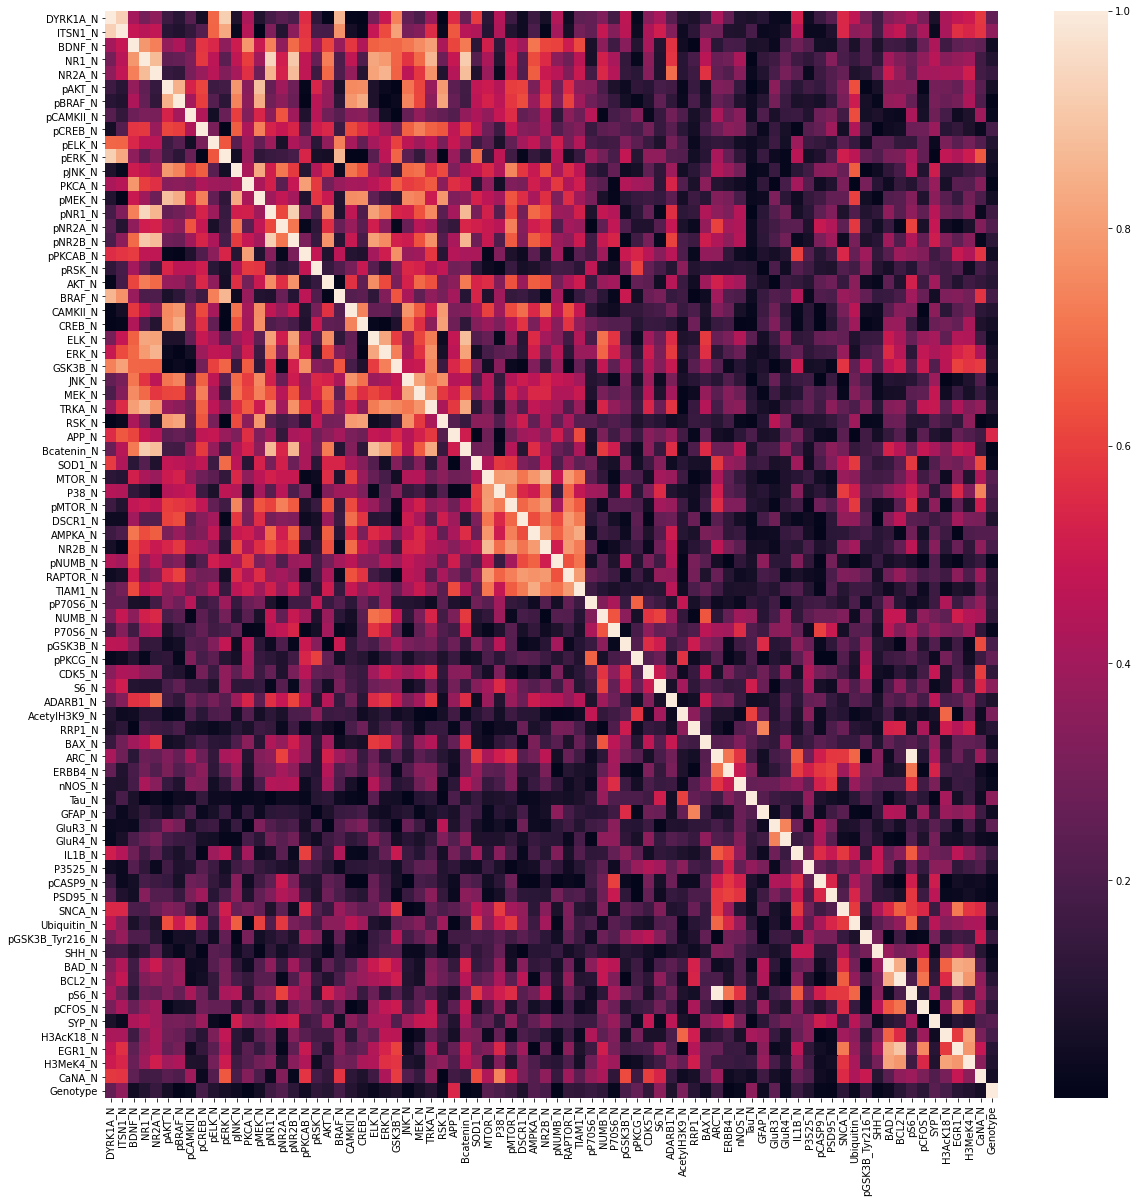

In [ ]:
corrMatrix = train_new_df.corr(method = 'spearman')
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

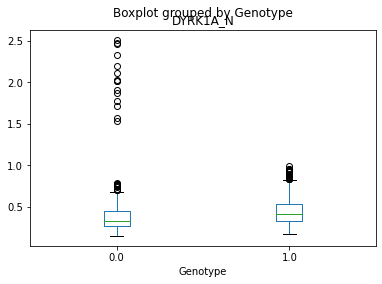

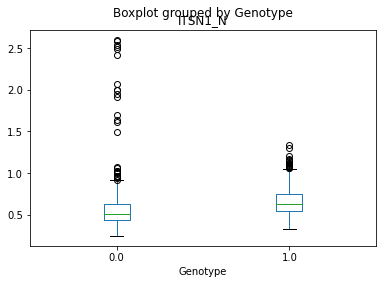

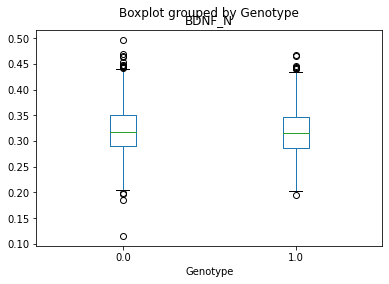

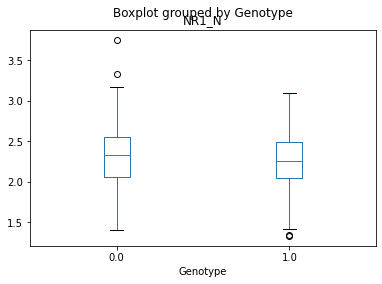

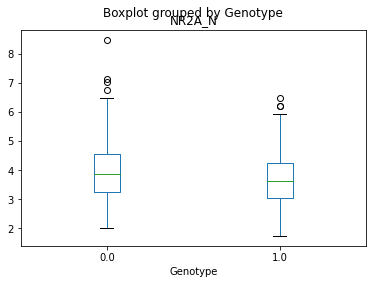

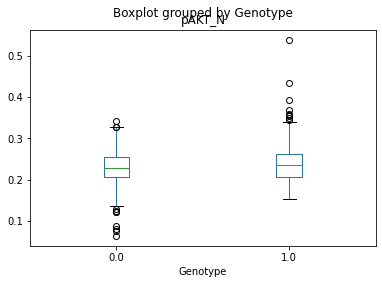

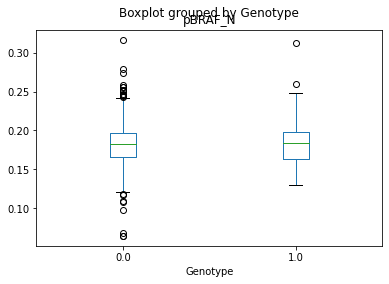

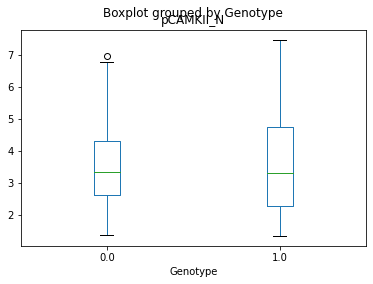

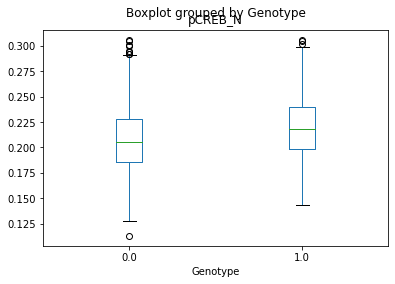

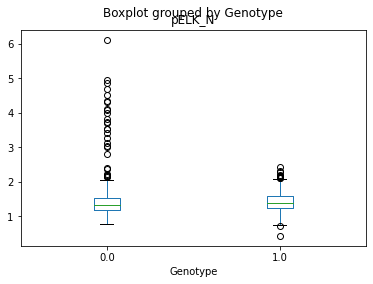

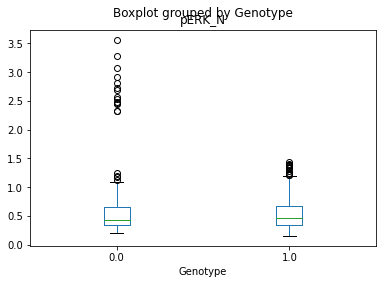

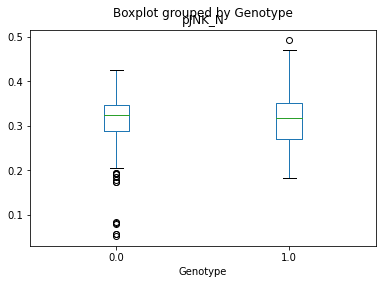

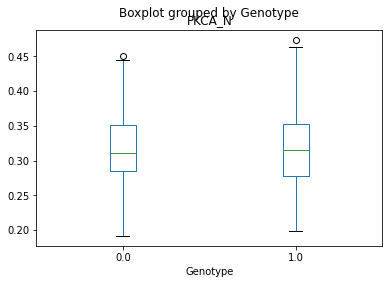

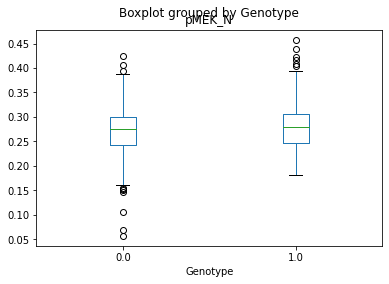

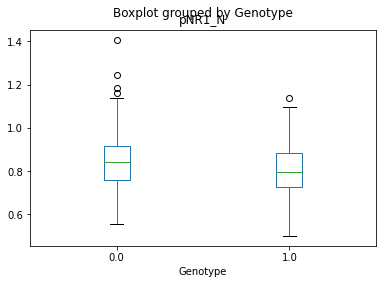

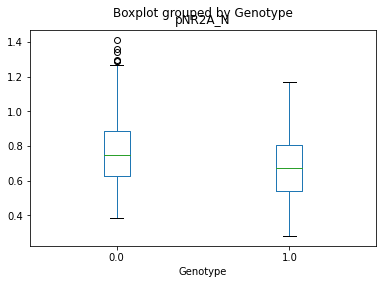

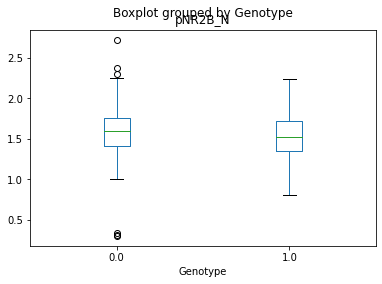

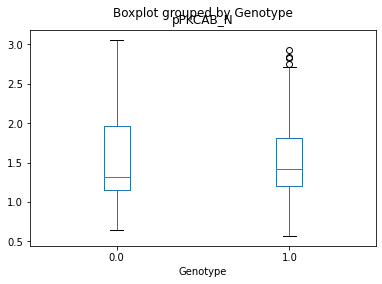

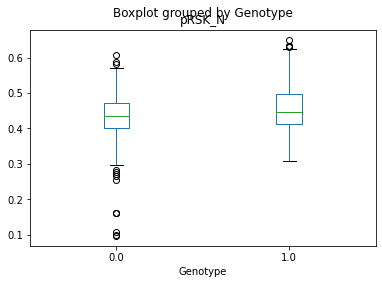

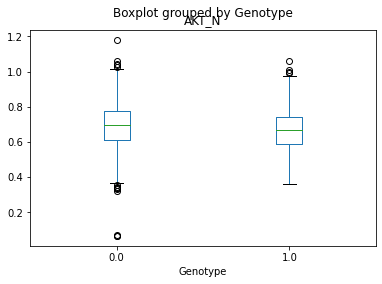

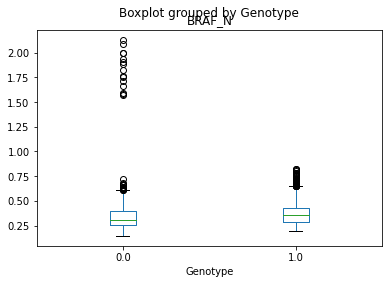

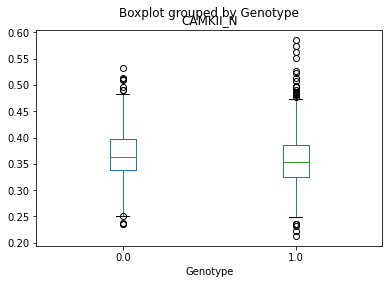

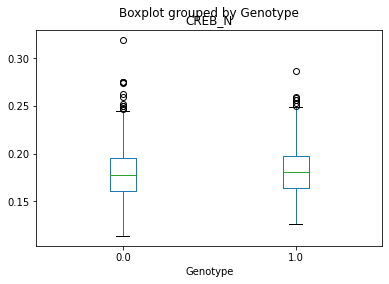

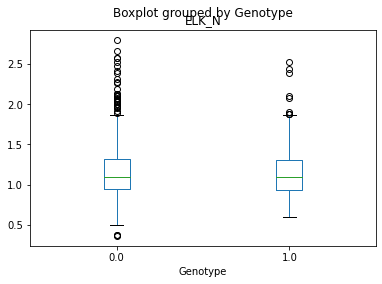

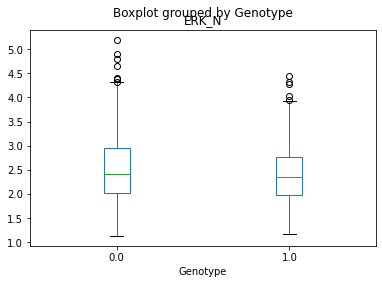

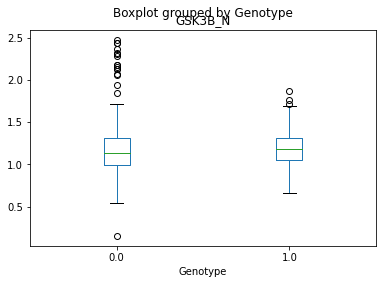

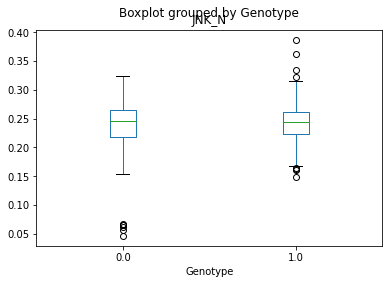

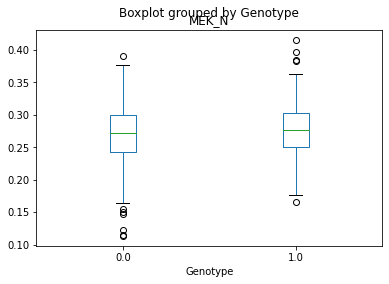

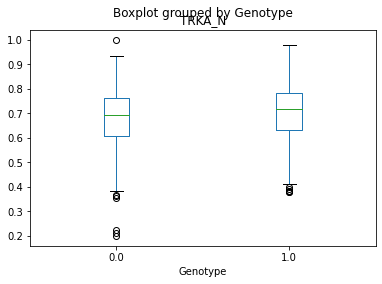

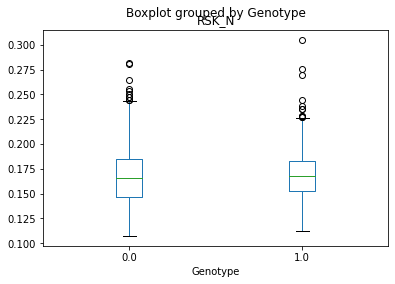

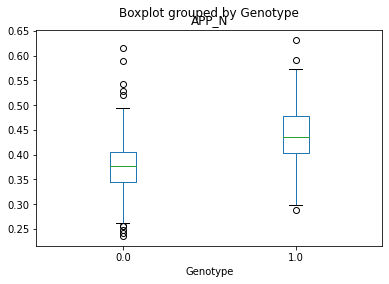

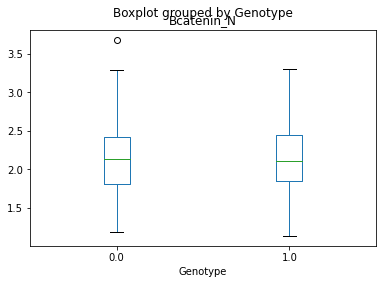

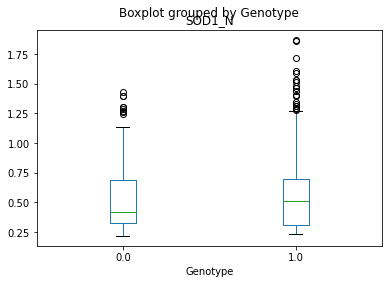

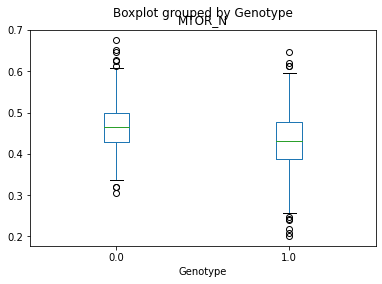

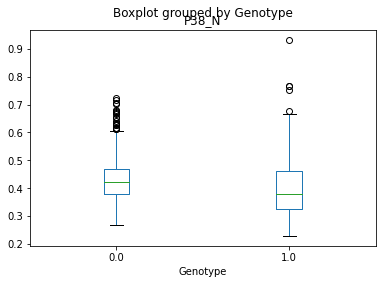

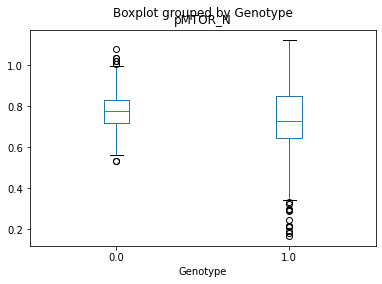

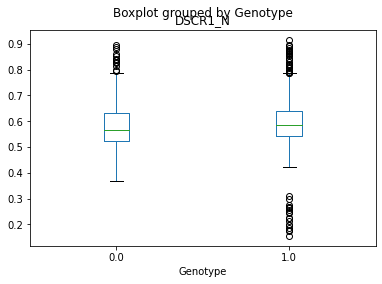

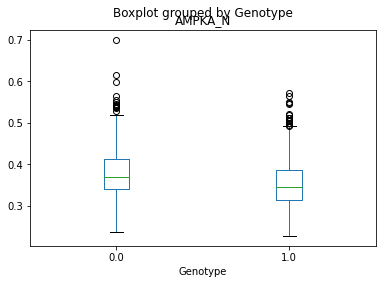

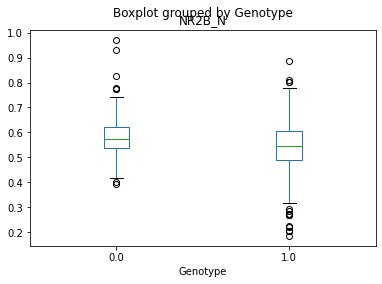

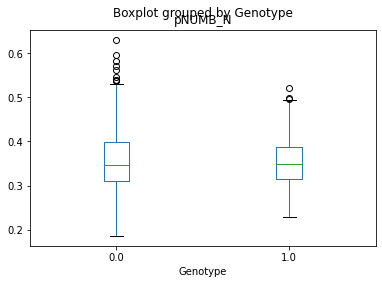

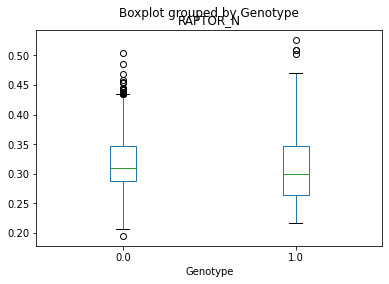

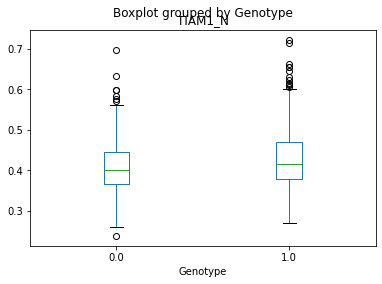

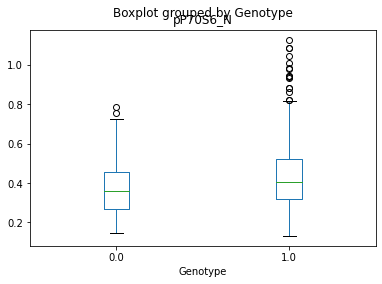

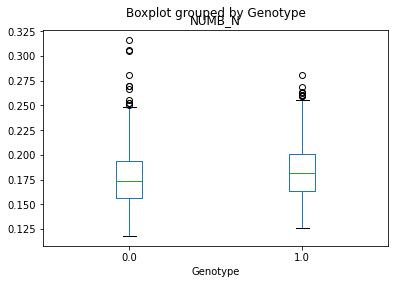

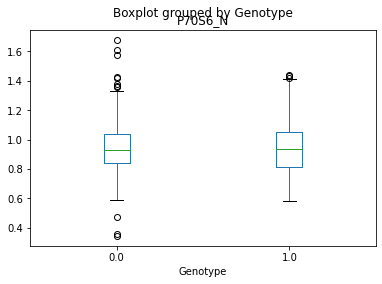

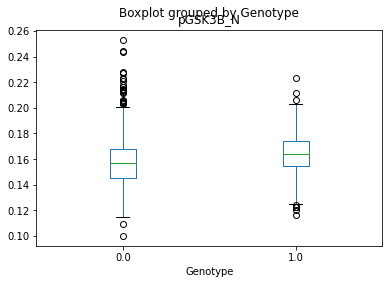

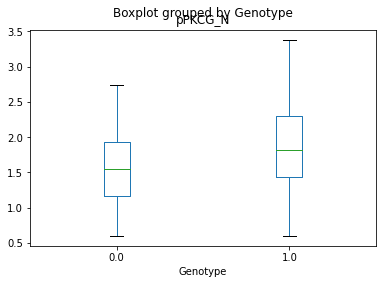

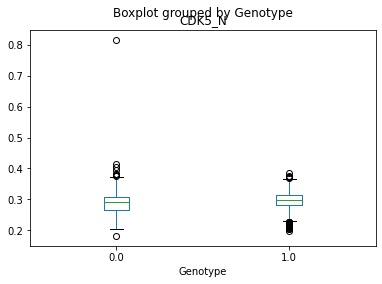

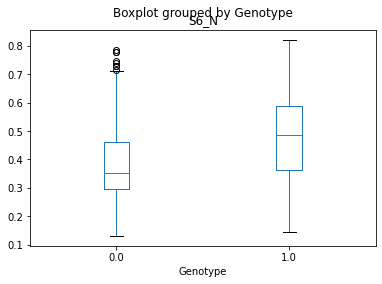

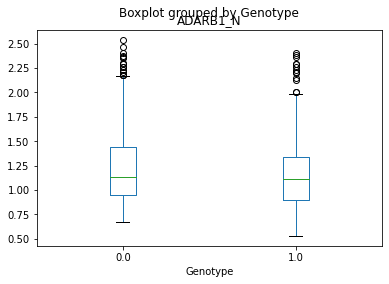

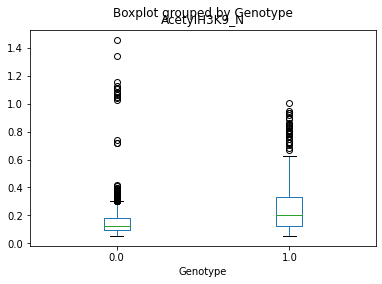

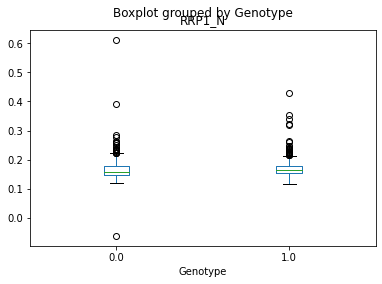

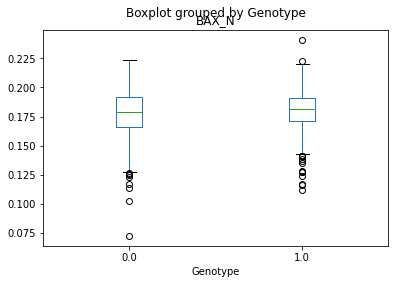

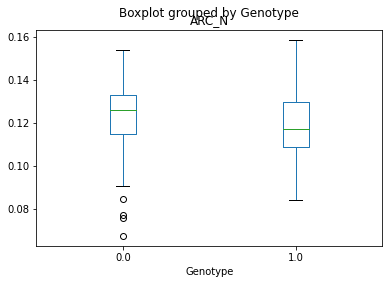

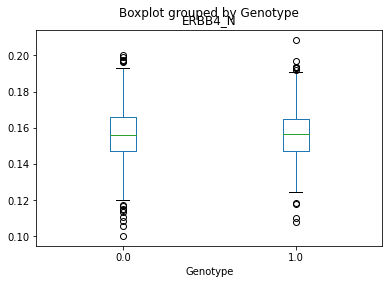

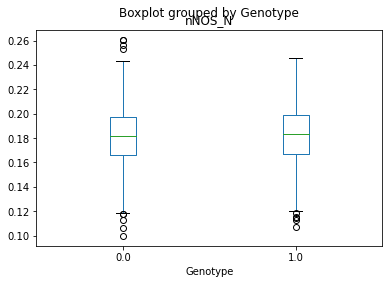

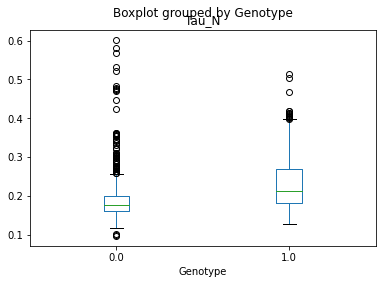

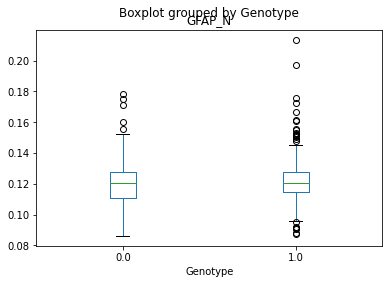

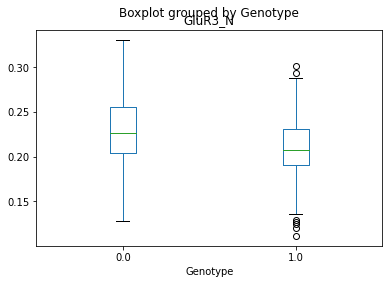

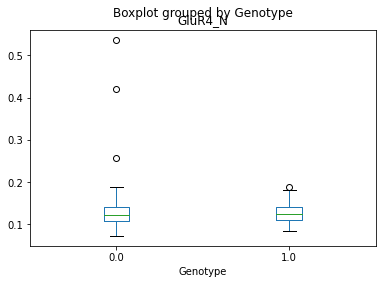

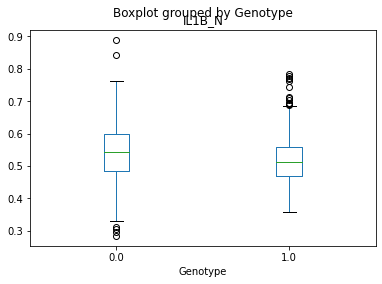

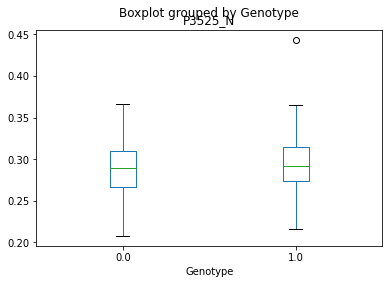

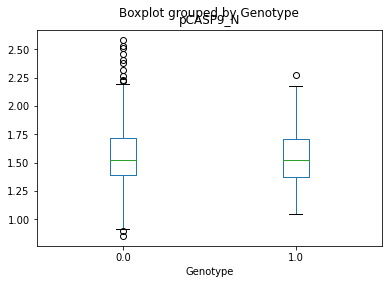

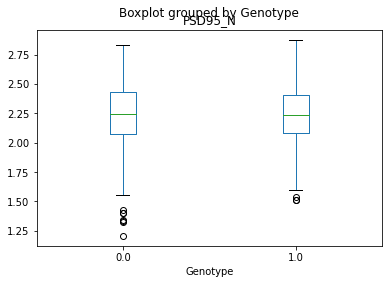

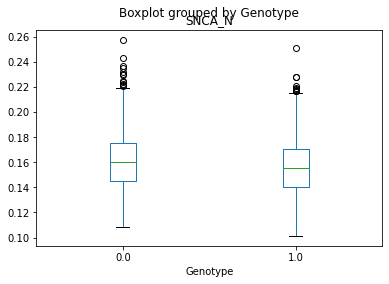

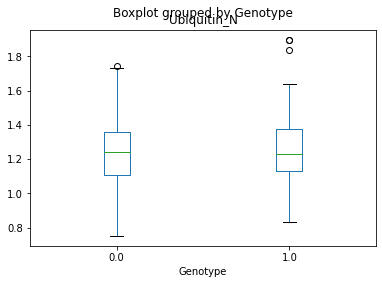

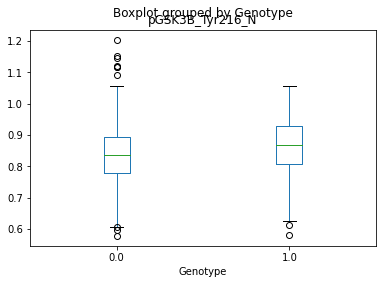

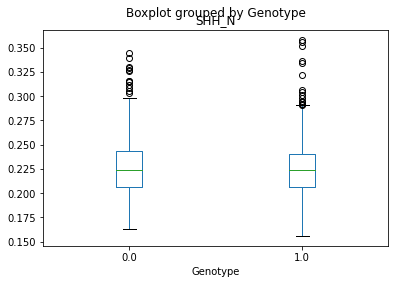

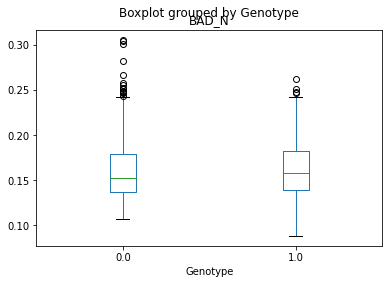

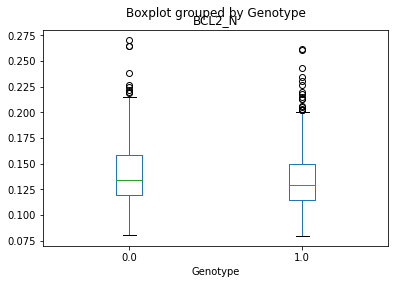

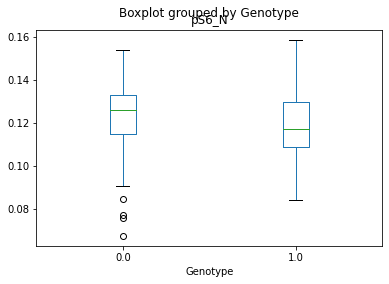

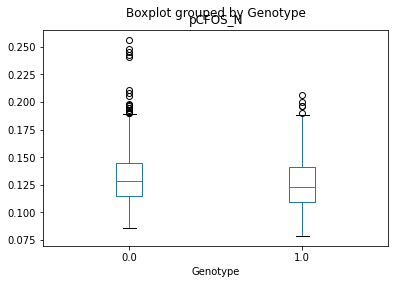

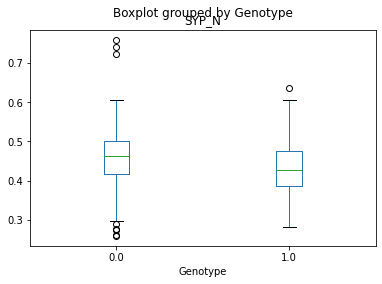

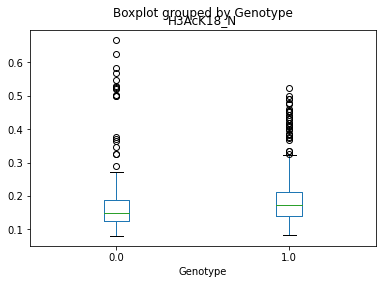

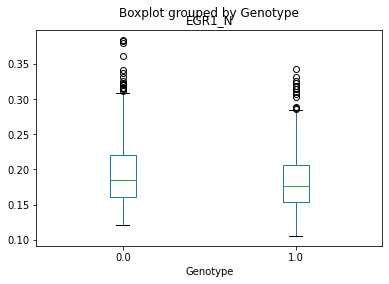

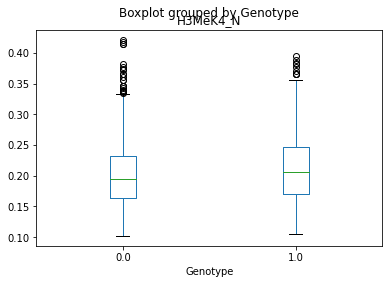

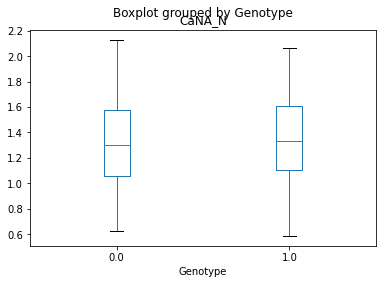

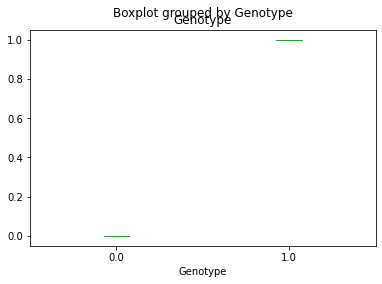

In [ ]:
for col in train_df.columns.values :
    train_new_df.boxplot(by = 'Genotype' ,column =col,grid = False)

In [ ]:
train_new_df.columns #column names to select what is to be retained

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,0.516781,2.304669,-0.346510,-0.899149,0.602763,0.411850,-0.137376,1.624683,0.473283,1.627860,-0.021929,1.392990,0.173769,-0.060460,1.490804,-0.093445,0.803348,2.054303,-0.617496,0.094006,-0.645359,-0.581109,1.626891,-0.455759,0.060645,-0.543186,0.391757,-0.250311,-0.236154,0.507232,-0.762636,-0.185986,-1.236610,-0.423238,0.177590,-1.175225,-1.457889,0.221607,-0.866619,-2.137075,-1.119835,-0.182566,-1.305403,-0.981962,-1.066276,-0.905873,-0.285744,-0.804960
1,0.285395,1.977314,-0.519511,-0.962259,0.441352,0.432449,-0.278668,1.304199,0.134717,1.075416,0.032404,1.198764,0.100054,-0.260363,1.376318,-0.401257,0.427202,1.787085,-0.714722,-0.441005,-0.758998,-0.552806,1.741243,-0.462039,0.043512,-0.543596,0.301190,-0.243248,-0.266690,0.279699,-0.398749,-0.120088,-1.104906,-0.200696,0.465222,-0.855804,-1.121424,0.497507,-0.907006,-2.074347,-1.322118,0.005344,-0.906725,-0.923805,-1.046167,-1.070735,-0.067645,-0.841624
2,0.449325,1.909743,-0.582643,-0.969076,0.542001,0.381218,-0.428524,1.208614,0.143208,1.023328,0.369064,1.038945,0.097659,-0.251817,1.343557,-0.269564,0.300240,1.838464,-0.709663,-0.418904,-0.885726,-0.503308,2.048102,-0.315190,0.252837,-0.314019,0.227284,-0.167506,-0.562562,0.596537,-0.740008,-0.204246,-1.129764,-0.236554,0.658634,-0.205760,-1.197726,0.464494,-0.858927,-2.138655,-1.397250,-0.021831,-1.138611,-0.933746,-0.926271,-0.992666,-0.155059,-0.842807
3,-0.001152,1.220348,-0.248974,-1.070426,-0.172367,0.108286,-0.323431,1.133526,0.839964,1.261951,0.519093,0.357959,0.031891,-0.041299,1.009910,-0.222800,0.094355,0.813503,-0.706760,-0.354563,0.023208,-1.058608,1.189617,-0.162955,0.105658,-1.008513,0.003718,-0.306027,-0.016278,0.319739,-1.050318,-0.702437,-1.265327,-0.260806,0.375563,-1.174757,-1.339051,-0.256932,-1.093307,-1.654497,-1.435423,-0.164318,-1.192887,-0.659587,-1.285019,-0.785885,-0.818989,-0.601103
4,0.000256,0.940511,-0.484164,-1.084570,-0.628672,0.014525,-0.511690,0.873005,0.061951,1.014415,0.605267,0.044207,-0.051930,-0.216474,0.765065,-0.485431,-0.103222,0.712737,-0.761687,-0.667447,-0.009379,-1.012998,1.269871,-0.105144,0.117638,-0.872642,0.026481,-0.279836,-0.186453,0.473739,-0.962207,-0.545639,-1.067754,-0.366012,0.965791,-0.562332,-1.316721,-0.054482,-0.889295,-1.669362,-1.391905,0.317194,-0.727242,-0.683896,-1.172895,-0.809178,-0.179502,-0.756700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.612101,-1.332573,-0.517119,-0.814073,-0.162751,-0.813276,-0.374156,-1.305348,-0.301186,-0.590132,-0.304431,-0.345576,-0.569378,0.365916,-0.735799,-0.101974,-0.534456,-0.738015,0.991262,-1.104673,0.846439,-0.898461,0.876690,1.598526,0.712697,1.640180,-1.272745,1.708778,0.941881,0.183644,0.253963,0.323591,2.911026,1.058953,-0.404435,-0.288944,1.169462,-0.906365,1.348176,0.304918,0.128994,1.211184,1.686625,0.572980,-0.400501,2.169091,-1.084095,1.857078
1076,-0.570021,-1.116431,0.433705,-0.791646,0.114545,-0.799532,-0.547246,-1.307142,-0.489373,-0.341893,-0.417718,-0.290664,-0.586703,0.026055,-0.810343,0.822542,-0.718300,-0.610656,1.113301,-1.103038,0.790934,-1.042038,0.477255,1.533497,0.707460,1.476530,-1.220693,1.782533,0.682496,-0.655799,0.338436,0.234698,2.777468,0.735297,-0.479986,-0.179248,1.762729,-1.099696,1.176319,0.404795,0.089924,1.431283,1.950957,0.378552,-0.554066,1.855388,-1.066451,1.946566
1077,-0.884416,-1.739397,-0.302378,-1.196171,-0.843619,-0.844020,-1.306914,-1.851882,-0.418987,-0.958005,-0.521996,-1.116296,-0.651320,1.218657,-1.451546,-0.011072,-1.553671,-1.509162,0.426161,-1.758178,0.418258,-0.800083,0.497221,1.594134,0.559201,1.751273,-1.198427,1.729900,1.086485,-0.538418,1.179947,0.153824,2.684322,1.224110,-0.595447,1.266030,2.227840,-0.446799,1.216307,0.823185,0.017164,1.356166,2.214507,1.073615,-0.1

0     1.927471e-16
1    -2.138207e-17
2     7.114165e-16
3     1.426842e-16
4    -4.655227e-16
5    -4.800687e-17
6     6.412052e-16
7    -6.684982e-16
8    -1.598618e-15
9     2.630612e-16
10   -3.063136e-16
11    3.897088e-16
12   -1.198116e-16
13    2.216334e-16
14   -1.639635e-16
15    7.160939e-16
16    8.989016e-16
17   -2.455854e-16
18    2.711823e-16
19    9.447176e-17
20    8.234154e-17
21   -3.125072e-17
22   -1.045460e-15
23    1.161622e-16
24   -7.477558e-16
25    6.836095e-16
26    4.508739e-16
27    3.318333e-16
28    1.584124e-16
29   -5.416449e-16
30    4.350429e-16
31   -7.144491e-18
32    2.138207e-16
33    6.494805e-16
34    3.845689e-16
35   -6.905998e-16
36    3.026386e-16
37   -1.209424e-16
38   -1.287036e-15
39   -4.913765e-17
40   -1.379966e-15
41    2.578185e-16
42   -4.946660e-16
43    7.843520e-16
44    6.759768e-16
45    1.140651e-15
46    5.900630e-17
47    1.373387e-16
dtype: float64


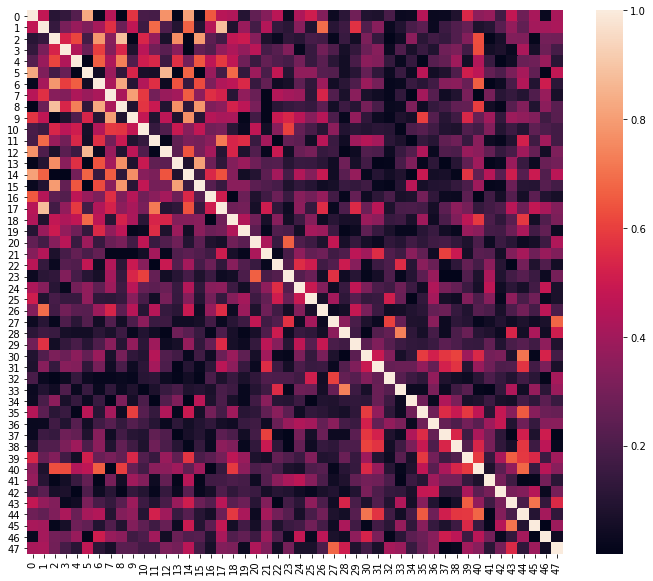

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
 
cols_to_retain = ['ITSN1_N', 'NR2A_N', 'pAKT_N','pCAMKII_N', 'pCREB_N', 'pERK_N', 'pJNK_N', 'PKCA_N','pMEK_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N','BRAF_N', 'CREB_N', 'GSK3B_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N','pP70S6_N', 'P70S6_N', 'pGSK3B_N','pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N','BAX_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N','Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BCL2_N', 'pS6_N','pCFOS_N', 'SYP_N', 'H3AcK18_N']
scaler.fit(train_new_df[cols_to_retain])
train_X = pd.DataFrame(scaler.transform(train_new_df[cols_to_retain]))
train_Y = pd.DataFrame(train_new_df['Genotype'])
display(train_X)
print(train_X.mean())
 
 
corrMatrix = train_X.corr(method ='spearman')
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix),annot=False)
plt.show()

In [ ]:
import sklearn.model_selection as model_selection
x_train ,x_test ,y_train, y_test = model_selection.train_test_split(train_X,train_Y,train_size=0.80) #splitting data to create test data

#L1(Lasso) regularized logistic regression model 
informations about hyperparameters and score measures :
https://scikit-learn.org/stable/modules/ is used for below models

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")
lasso = linear_model.LogisticRegression()
hyperparameters = {'penalty' :['l1','l2'], 'max_iter' : [100,500,1000,5000]}
scoring = 'f1_weighted'
clf = GridSearchCV(lasso, param_grid=hyperparameters,scoring=scoring)
clf.fit(np.array(x_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print('Best '+ scoring +" :" + str(clf.best_score_))
 
print('Test Classification  report')
y_true, y_pred = np.squeeze(y_test) , clf.predict(np.array(x_test))
print("accuracy score :",accuracy_score(y_true,y_pred))
print("explained variance score :",explained_variance_score(y_true,y_pred))

Best parameters :
{'max_iter': 100, 'penalty': 'l2'}
Best f1_weighted :0.9490560721985404
Test Classification  report
accuracy score : 0.9444444444444444
explained variance score : 0.7641062977793958


#SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
 
print('Training SVC using GridSearch')
scoring = "f1"
 
from sklearn import svm
hyperparameters = {'kernel' : ('rbf','linear','poly','sigmoid'),'C':[.1,1,5,10],'degree':[2,3,4,5]}
 
svc = svm.SVC()
clf = GridSearchCV(estimator=svc,param_grid = hyperparameters , scoring = scoring)
clf.fit(np.array(x_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print("Best " + scoring + " :" + str(clf.best_score_))
print('Test Classification report :')
y_true,y_pred = np.squeeze(y_test),clf.predict(np.array(x_test))
print(classification_report(y_true,y_pred))
print('Test AUC-ROC : ' + str(roc_auc_score(y_true ,y_pred)))

Training SVC using GridSearch
Best parameters :
{'C': 5, 'degree': 2, 'kernel': 'rbf'}
Best f1 :0.9976743399925633
Test Classification report :
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       134
         1.0       0.99      1.00      0.99        82

    accuracy                           1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

Test AUC-ROC : 0.9962686567164178


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
hyperparameters = {'max_depth' : [2,5,10,20],'n_estimators':[10,30,100]}
scoring= "f1_weighted"
clf = GridSearchCV(rfc,param_grid=hyperparameters,scoring=scoring)
clf.fit(np.array(x_train),np.squeeze(y_train))
print('Best parameters :')
print(clf.best_params_)
print('Best '+ scoring +" :" + str(clf.best_score_))
 
print('Test Classification  report')
y_true,y_pred = np.squeeze(y_test) , clf.predict(np.array(x_test))
print(classification_report(y_true,y_pred))


Best parameters :
{'max_depth': 10, 'n_estimators': 100}
Best f1_weighted :0.981466435800988
Test Classification  report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       167
         1.0       0.99      0.99      0.99       157

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



In [ ]:
#removing manually from col_to_retain pAKT_N and pCREB_N 
cols_to_retain = ['ITSN1_N', 'NR2A_N','pCAMKII_N', 'pERK_N', 'pJNK_N', 'PKCA_N','pMEK_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N','BRAF_N', 'CREB_N', 'GSK3B_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N','pP70S6_N', 'P70S6_N', 'pGSK3B_N','pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N','BAX_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N','Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BCL2_N', 'pS6_N','pCFOS_N', 'SYP_N', 'H3AcK18_N']
scaler.fit(train_new_df[cols_to_retain])
train_X = pd.DataFrame(scaler.transform(train_new_df[cols_to_retain]))
train_Y = pd.DataFrame(train_new_df['Genotype'])
display(train_X)
print(train_X.mean())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.516781,2.304669,-0.899149,0.411850,-0.137376,1.624683,0.473283,1.627860,-0.021929,1.392990,0.173769,-0.060460,1.490804,-0.093445,0.803348,2.054303,-0.617496,0.094006,-0.645359,-0.581109,1.626891,-0.455759,0.060645,-0.543186,0.391757,-0.250311,-0.236154,0.507232,-0.762636,-0.185986,-1.236610,-0.423238,0.177590,-1.175225,-1.457889,0.221607,-0.866619,-2.137075,-1.119835,-0.182566,-1.305403,-0.981962,-1.066276,-0.905873,-0.285744,-0.804960
1,0.285395,1.977314,-0.962259,0.432449,-0.278668,1.304199,0.134717,1.075416,0.032404,1.198764,0.100054,-0.260363,1.376318,-0.401257,0.427202,1.787085,-0.714722,-0.441005,-0.758998,-0.552806,1.741243,-0.462039,0.043512,-0.543596,0.301190,-0.243248,-0.266690,0.279699,-0.398749,-0.120088,-1.104906,-0.200696,0.465222,-0.855804,-1.121424,0.497507,-0.907006,-2.074347,-1.322118,0.005344,-0.906725,-0.923805,-1.046167,-1.070735,-0.067645,-0.841624
2,0.449325,1.909743,-0.969076,0.381218,-0.428524,1.208614,0.143208,1.023328,0.369064,1.038945,0.097659,-0.251817,1.343557,-0.269564,0.300240,1.838464,-0.709663,-0.418904,-0.885726,-0.503308,2.048102,-0.315190,0.252837,-0.314019,0.227284,-0.167506,-0.562562,0.596537,-0.740008,-0.204246,-1.129764,-0.236554,0.658634,-0.205760,-1.197726,0.464494,-0.858927,-2.138655,-1.397250,-0.021831,-1.138611,-0.933746,-0.926271,-0.992666,-0.155059,-0.842807
3,-0.001152,1.220348,-1.070426,0.108286,-0.323431,1.133526,0.839964,1.261951,0.519093,0.357959,0.031891,-0.041299,1.009910,-0.222800,0.094355,0.813503,-0.706760,-0.354563,0.023208,-1.058608,1.189617,-0.162955,0.105658,-1.008513,0.003718,-0.306027,-0.016278,0.319739,-1.050318,-0.702437,-1.265327,-0.260806,0.375563,-1.174757,-1.339051,-0.256932,-1.093307,-1.654497,-1.435423,-0.164318,-1.192887,-0.659587,-1.285019,-0.785885,-0.818989,-0.601103
4,0.000256,0.940511,-1.084570,0.014525,-0.511690,0.873005,0.061951,1.014415,0.605267,0.044207,-0.051930,-0.216474,0.765065,-0.485431,-0.103222,0.712737,-0.761687,-0.667447,-0.009379,-1.012998,1.269871,-0.105144,0.117638,-0.872642,0.026481,-0.279836,-0.186453,0.473739,-0.962207,-0.545639,-1.067754,-0.366012,0.965791,-0.562332,-1.316721,-0.054482,-0.889295,-1.669362,-1.391905,0.317194,-0.727242,-0.683896,-1.172895,-0.809178,-0.179502,-0.756700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.612101,-1.332573,-0.814073,-0.813276,-0.374156,-1.305348,-0.301186,-0.590132,-0.304431,-0.345576,-0.569378,0.365916,-0.735799,-0.101974,-0.534456,-0.738015,0.991262,-1.104673,0.846439,-0.898461,0.876690,1.598526,0.712697,1.640180,-1.272745,1.708778,0.941881,0.183644,0.253963,0.323591,2.911026,1.058953,-0.404435,-0.288944,1.169462,-0.906365,1.348176,0.304918,0.128994,1.211184,1.686625,0.572980,-0.400501,2.169091,-1.084095,1.857078
1076,-0.570021,-1.116431,-0.791646,-0.799532,-0.547246,-1.307142,-0.489373,-0.341893,-0.417718,-0.290664,-0.586703,0.026055,-0.810343,0.822542,-0.718300,-0.610656,1.113301,-1.103038,0.790934,-1.042038,0.477255,1.533497,0.707460,1.476530,-1.220693,1.782533,0.682496,-0.655799,0.338436,0.234698,2.777468,0.735297,-0.479986,-0.179248,1.762729,-1.099696,1.176319,0.404795,0.089924,1.431283,1.950957,0.378552,-0.554066,1.855388,-1.066451,1.946566
1077,-0.884416,-1.739397,-1.196171,-0.844020,-1.306914,-1.851882,-0.418987,-0.958005,-0.521996,-1.116296,-0.651320,1.218657,-1.451546,-0.011072,-1.553671,-1.509162,0.426161,-1.758178,0.418258,-0.800083,0.497221,1.594134,0.559201,1.751273,-1.198427,1.729900,1.086485,-0.538418,1.179947,0.153824,2.684322,1.224110,-0.595447,1.266030,2.227840,-0.446799,1.216307,0.823185,0.017164,1.356166,2.214507,1.073615,-0.180275,1.142775,-0.360708,1.890014
1078,-0.813902,-1.564262,-1.121685,-0.914801,-0.970080,-1.795016,0.051530,-0.854032,-0.126216,-0.922955,-0.564899,-0.314588,-1.228029,-

0     1.927471e-16
1    -2.138207e-17
2     1.426842e-16
3    -4.800687e-17
4     6.412052e-16
5    -6.684982e-16
6    -1.598618e-15
7     2.630612e-16
8    -3.063136e-16
9     3.897088e-16
10   -1.198116e-16
11    2.216334e-16
12   -1.639635e-16
13    7.160939e-16
14    8.989016e-16
15   -2.455854e-16
16    2.711823e-16
17    9.447176e-17
18    8.234154e-17
19   -3.125072e-17
20   -1.045460e-15
21    1.161622e-16
22   -7.477558e-16
23    6.836095e-16
24    4.508739e-16
25    3.318333e-16
26    1.584124e-16
27   -5.416449e-16
28    4.350429e-16
29   -7.144491e-18
30    2.138207e-16
31    6.494805e-16
32    3.845689e-16
33   -6.905998e-16
34    3.026386e-16
35   -1.209424e-16
36   -1.287036e-15
37   -4.913765e-17
38   -1.379966e-15
39    2.578185e-16
40   -4.946660e-16
41    7.843520e-16
42    6.759768e-16
43    1.140651e-15
44    5.900630e-17
45    1.373387e-16
dtype: float64


checking for svm if removing manually any feature can improve model or not

In [ ]:
print('Training SVC using GridSearch')
scoring = "f1"
 
hyperparameters = {'kernel' : ('rbf','linear','poly','sigmoid'),'C':[.1,1,5,10],'degree':[2,3,4,5]}
 
svc1 = svm.SVC()
clf_new = GridSearchCV(estimator=svc1,param_grid = hyperparameters , scoring = scoring)
clf_new.fit(np.array(x_train),np.squeeze(y_train))
print('Best parameters :')
print(clf_new.best_params_)
print("Best " + scoring + " :" + str(clf_new.best_score_))
print('Test Classification report :')
y_true,y_pred = np.squeeze(y_test),clf.predict(np.array(x_test))
print(classification_report(y_true,y_pred))
print('Test AUC-ROC : ' + str(roc_auc_score(y_true ,y_pred)))

Training SVC using GridSearch
Best parameters :
{'C': 5, 'degree': 2, 'kernel': 'rbf'}
Best f1 :0.9976743399925633
Test Classification report :
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       134
         1.0       0.93      0.93      0.93        82

    accuracy                           0.94       216
   macro avg       0.94      0.94      0.94       216
weighted avg       0.94      0.94      0.94       216

Test AUC-ROC : 0.9410265744448488


When randomly selected and removed two features then the AUC-ROC score reduced and accuracy is also reduced.
Systematically selecting features might improve model.